## 10. Combining Multiple Datasets in the Movie Lens Dataset
### <b>Task:</b> Combine and preprocess multiple related datasets from the Movie Lens dataset, such as ratings, user information, and movie metadata.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading all the relevant dataset to MovieLens Dataset
movies_dataset = pd.read_csv('Datasets\\Movie Lens Dataset\\movies.csv')
links_dataset = pd.read_csv('Datasets\\Movie Lens Dataset\\links.csv')
ratings_dataset = pd.read_csv('Datasets\\Movie Lens Dataset\\ratings.csv')
tags_dataset = pd.read_csv('Datasets\\Movie Lens Dataset\\tags.csv')

# Printing the shape of each dataset
print('Shape of movies dataset:', movies_dataset.shape)
print('Shape of links dataset:', links_dataset.shape)
print('Shape of ratings dataset:', ratings_dataset.shape)
print('Shape of tags dataset:', tags_dataset.shape)

Shape of movies dataset: (9742, 3)
Shape of links dataset: (9742, 3)
Shape of ratings dataset: (100836, 4)
Shape of tags dataset: (3683, 4)


In [3]:
# Printing head of each dataset
print('Head of movies dataset:\n', movies_dataset.head().to_string())
print('\n\nHead of links dataset:\n', links_dataset.head().to_string())
print('\n\nHead of ratings dataset:\n', ratings_dataset.head().to_string())
print('\n\nHead of tags dataset:\n', tags_dataset.head().to_string())

Head of movies dataset:
    movieId                               title                                       genres
0        1                    Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2                      Jumanji (1995)                   Adventure|Children|Fantasy
2        3             Grumpier Old Men (1995)                               Comedy|Romance
3        4            Waiting to Exhale (1995)                         Comedy|Drama|Romance
4        5  Father of the Bride Part II (1995)                                       Comedy


Head of links dataset:
    movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


Head of ratings dataset:
    userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1  

<h2>Combining Datasets</h2>

In [4]:
# Combining datasets on the basis of similar features they contain

# Merging movies and links dataset on 'movieId'
movies_links_dataset = pd.merge(movies_dataset, links_dataset, on='movieId')
movies_links_dataset.shape

(9742, 5)

In [5]:
# Merging ratings and tags dataset on 'movieId'
movies_links_ratings_dataset = pd.merge(movies_links_dataset, ratings_dataset, on='movieId')
movies_links_ratings_dataset.shape

(100836, 8)

In [6]:
# Merging movies_links_ratings and tags dataset on 'movieId'
final_combined_dataset = pd.merge(movies_links_ratings_dataset, tags_dataset, on=['movieId', 'userId'], how='left')

# Printing the shape of final combined dataset
print('Shape of final combined dataset:', final_combined_dataset.shape)

Shape of final combined dataset: (102677, 10)


-> So now the datasets have been combined and merged into a single final combined movie lens dataset.

<h2>Preprocessing the Combined Dataset</h2>

In [7]:
# Printing the head of dataset
final_combined_dataset.head()

,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp_x,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,NaN,NaN
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,NaN,NaN
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7,4.5,1106635946,NaN,NaN
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15,2.5,1510577970,NaN,NaN
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17,4.5,1305696483,NaN,NaN


In [8]:
# Checking for the missing values
final_combined_dataset.isnull().sum()

movieId            0
title              0
genres             0
imdbId             0
tmdbId            13
userId             0
rating             0
timestamp_x        0
tag            99201
timestamp_y    99201
dtype: int64

In [9]:
# Handling the missing values
# Filling the missing values in 'tmdbId' by forward fill
final_combined_dataset['tmdbId'] = final_combined_dataset['tmdbId'].ffill() 

# Since, the 'tag' and 'timestamp_y' have 99201 missing values out of 102677 which is very much significant amount. So dropping these features.
final_combined_dataset.drop(columns=['tag', 'timestamp_y'], axis=1, inplace=True)

In [10]:
# Checking again for the missing values and shape
print('Shape of final combined dataset:', final_combined_dataset.shape, '\n')
final_combined_dataset.isnull().sum()

Shape of final combined dataset: (102677, 8) 



movieId        0
title          0
genres         0
imdbId         0
tmdbId         0
userId         0
rating         0
timestamp_x    0
dtype: int64

-> Since there are no missing values, we can further preprocess the data.

In [11]:
final_combined_dataset.head()

,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp_x
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17,4.5,1305696483


<h2>Identifying and Handling Outliers</h2>

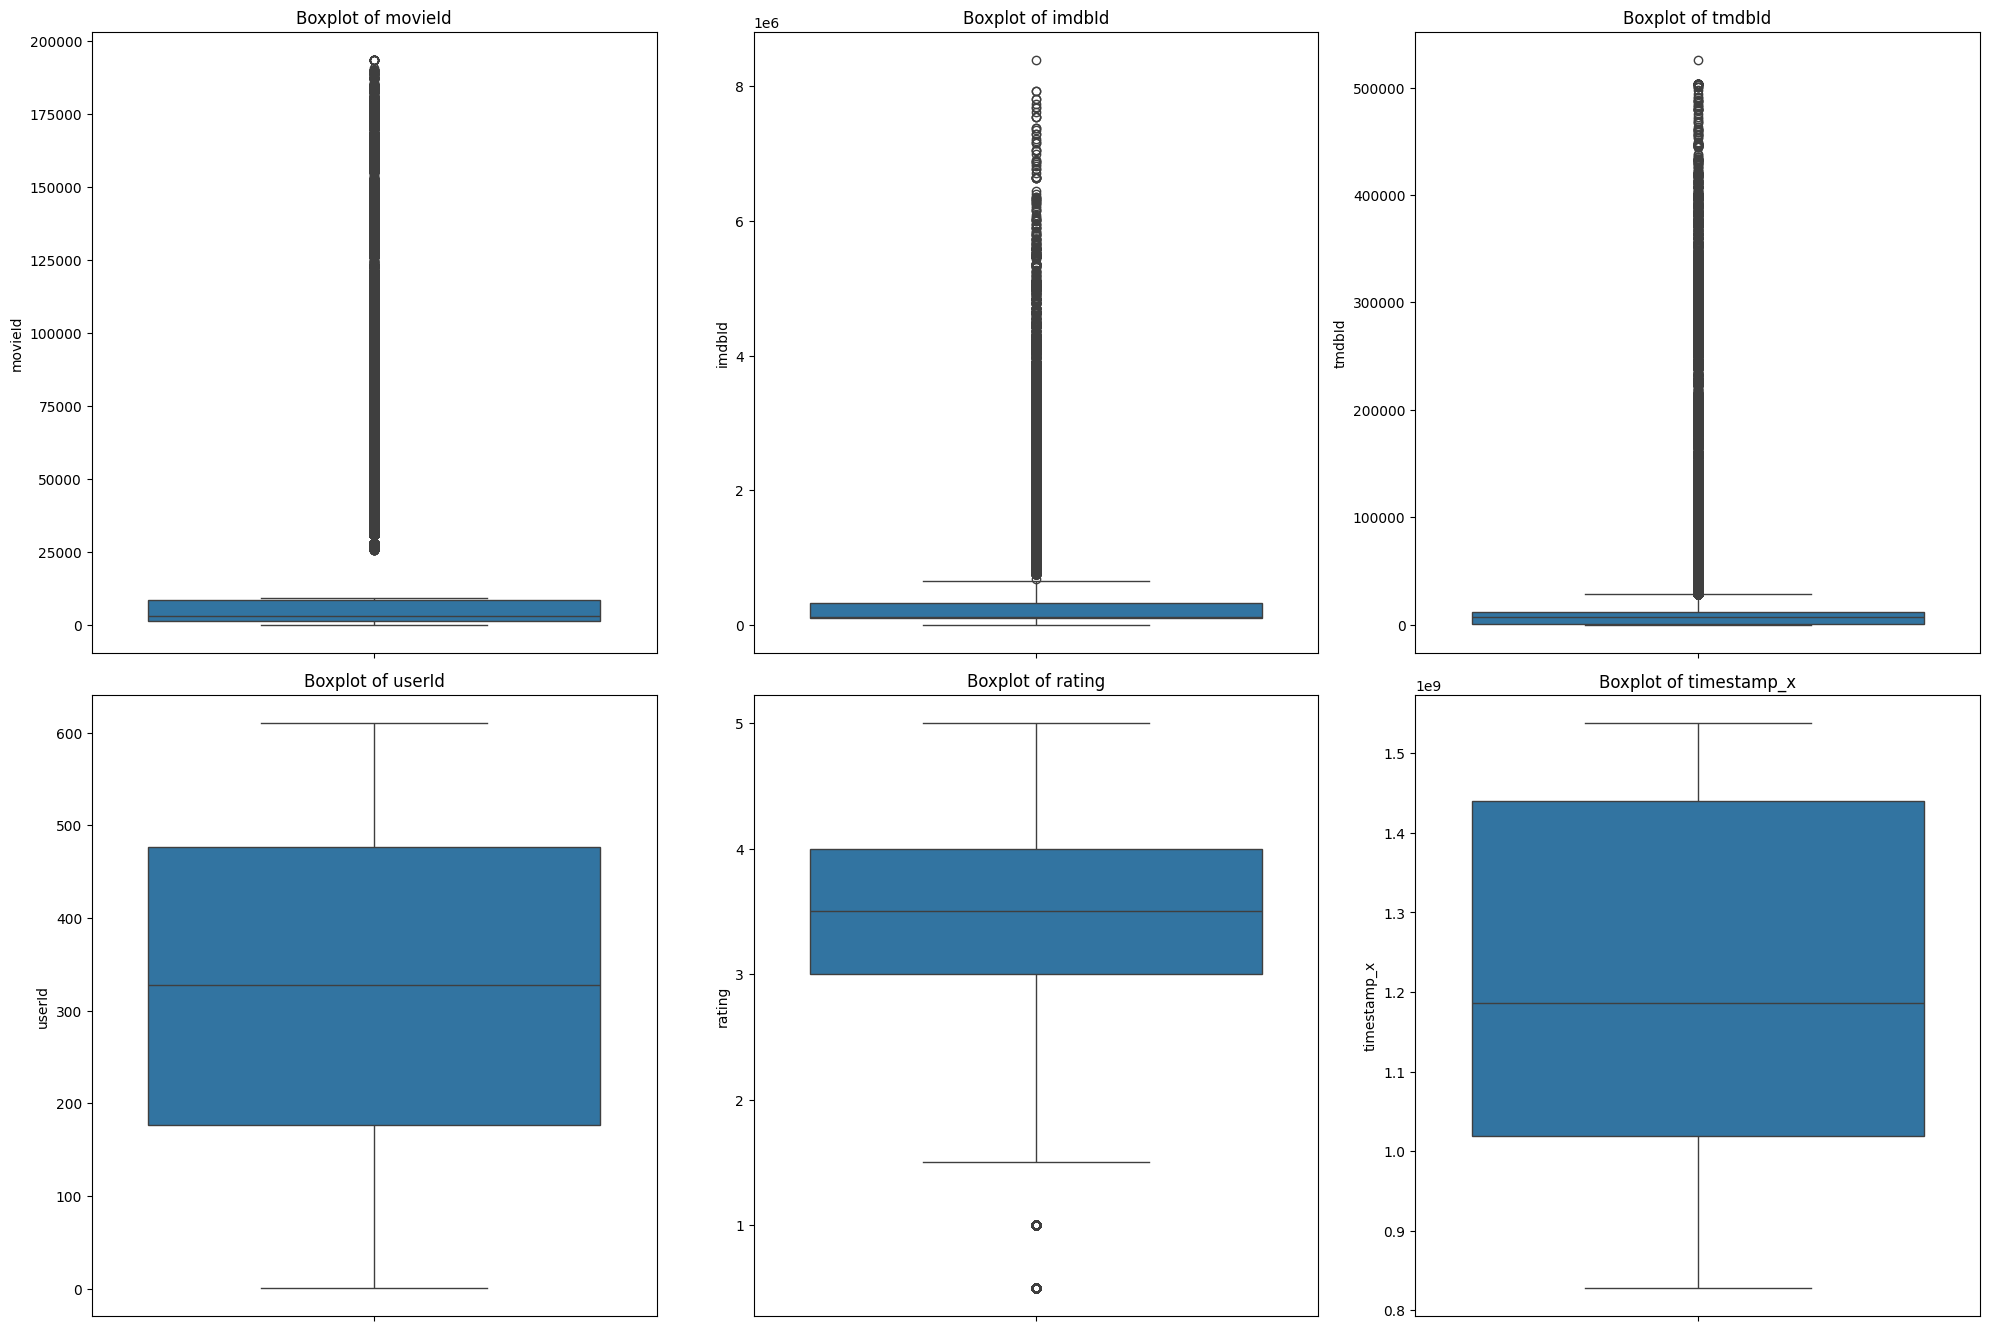

In [12]:
# Plotting the box plot to visualize the outliers
# Create a figure and a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a subplot (other than 'medv')
for i, feature in enumerate(final_combined_dataset.drop(columns=['title','genres']).columns):
    sns.boxplot(final_combined_dataset.drop(columns=['title', 'genres'])[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

-> So, 'movieId', 'imdbId', 'tmdbId' and 'rating' have outliers which we will handle through IQR method.

In [18]:
# Making the dataframe only for the outliers
outliers_df = final_combined_dataset.copy()
outliers_df.drop(columns=['title', 'genres'], inplace=True)

#  We'll handle the outliers of these features one by one. First finding the Q1, Q3, IQR, upper and lower limit for the skewed dataset.
Q1 = outliers_df.quantile(0.25)
Q3 = outliers_df.quantile(0.75)

# Finding the inter quartile range
IQR = Q3 - Q1
print('IQR:', IQR, '\n')

# Finding the upper and lower limits
upper_limit = Q3 + 1.5*IQR
print('Upper Limit:', upper_limit, '\n')

lower_limit = Q1 - 1.5*IQR
print('Lower Limit:', lower_limit)


IQR: movieId             7167.0
imdbId            217538.0
tmdbId             10963.0
userId               300.0
rating                 1.0
timestamp_x    420777911.0
dtype: float64 

Upper Limit: movieId        1.911650e+04
imdbId         6.435550e+05
tmdbId         2.811750e+04
userId         9.270000e+02
rating         5.500000e+00
timestamp_x    2.071082e+09
dtype: float64 

Lower Limit: movieId            -9551.5
imdbId           -226597.0
tmdbId            -15734.5
userId              -273.0
rating                 1.5
timestamp_x    387970744.5
dtype: float64


In [19]:
# Identifying outliers for each column and storing them in a dictionary
outliers_dict = {}
for column in outliers_df.columns:
    outliers = outliers_df[(outliers_df[column] > upper_limit[column]) | (outliers_df[column] < lower_limit[column])]
    outliers_dict[column] = outliers.shape[0]   # Storing only the count of outliers
    if outliers.empty:
        outliers_dict[column] = 'NaN'

# Printing the outliers count for each column where outliers exist
for column, count in outliers_dict.items():
    print(f"Count of outliers in {column}: {count}")

Count of outliers in movieId: 23625
Count of outliers in imdbId: 12988
Count of outliers in tmdbId: 13258
Count of outliers in userId: NaN
Count of outliers in rating: 4192
Count of outliers in timestamp_x: NaN


In [22]:
# Capping the outliers
for column in outliers_df.columns:
    outliers_df[column] = np.where(
        outliers_df[column] > upper_limit[column],        # Condition 1
        upper_limit[column],                               # If condition 1 is true
        np.where(                                  # If condition 1 is false
            outliers_df[column] < lower_limit[column],    # Condition 2
            lower_limit[column],                           # If condition 2 is true
            outliers_df[column]                   # If condition 2 is false
        )
    )

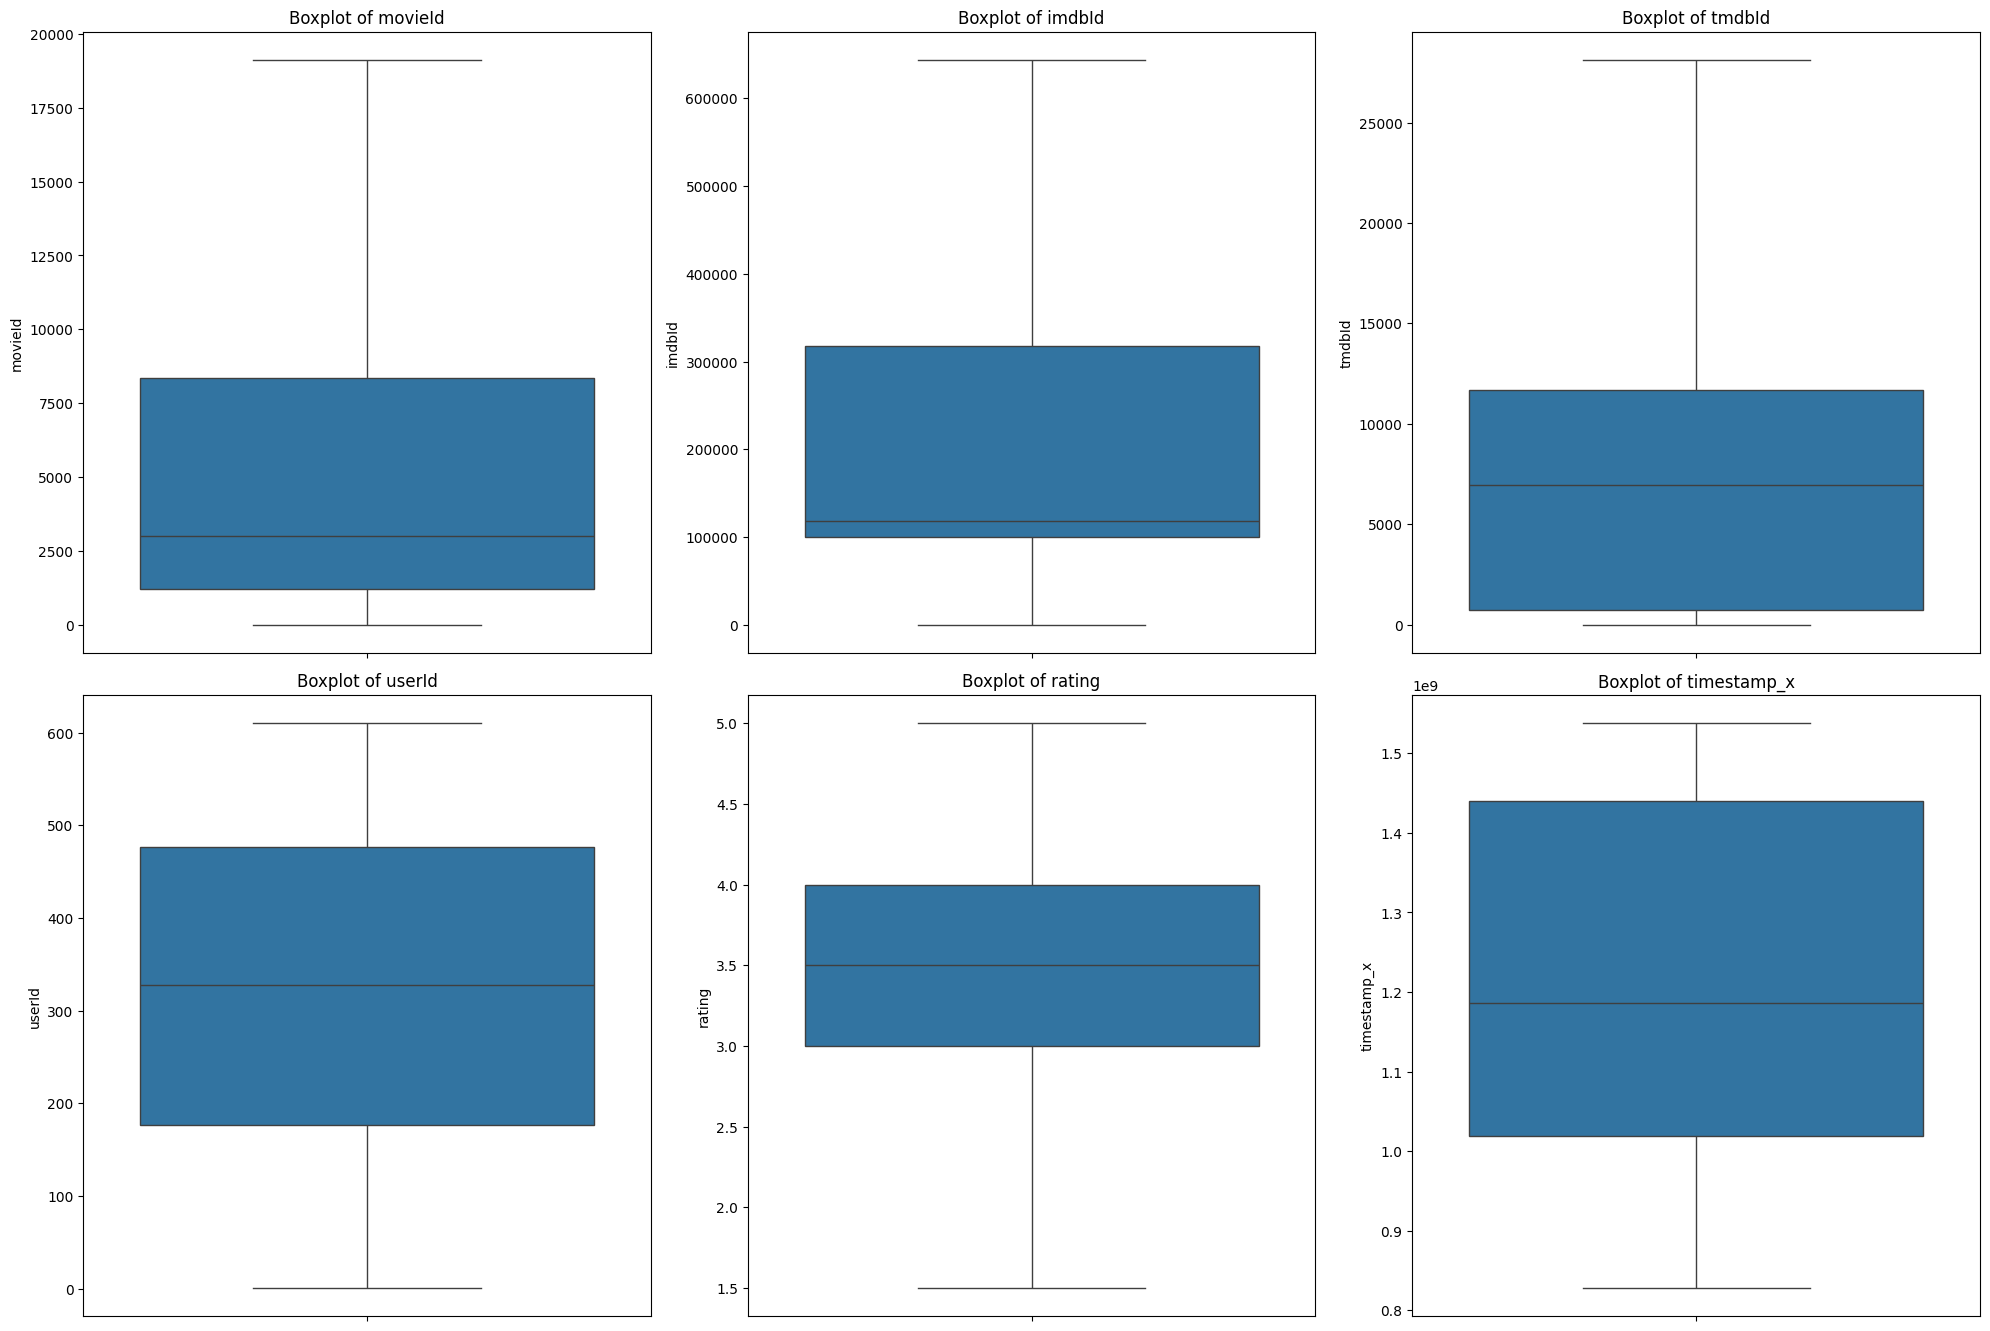

In [23]:
# Plotting the box plot to visualize the outliers
# Create a figure and a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a subplot (other than 'medv')
for i, feature in enumerate(outliers_df.columns):
    sns.boxplot(outliers_df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

-> So, all the outliers have been removed by preprocessing.

<h2>Feature Engineering</h2>

In [27]:
# Convert data types if necessary (e.g., 'timestamp' to datetime)
final_combined_dataset['timestamp'] = pd.to_datetime(final_combined_dataset['timestamp_x'], unit='s')
final_combined_dataset.head()

,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp_x,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,2000-07-30 18:45:03
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,1996-11-08 06:36:02
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7,4.5,1106635946,2005-01-25 06:52:26
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15,2.5,1510577970,2017-11-13 12:59:30
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17,4.5,1305696483,2011-05-18 05:28:03


In [29]:
# Display summary statistics of the combined DataFrame
print("\nSummary Statistics of Combined DataFrame:")
final_combined_dataset.describe()


Summary Statistics of Combined DataFrame:


,movieId,imdbId,tmdbId,userId,rating,timestamp_x,timestamp
count,102677.000000,1.026770e+05,102677.000000,102677.000000,102677.000000,1.026770e+05,102677
mean,19742.712623,3.564994e+05,20478.116618,327.761933,3.514813,1.209495e+09,2008-04-29 18:43:35.372615168
min,1.000000,4.170000e+02,2.000000,1.000000,0.500000,8.281246e+08,1996-03-29 18:36:55
25%,1199.000000,9.971000e+04,710.000000,177.000000,3.000000,1.019138e+09,2002-04-18 13:46:51
50%,3005.000000,1.188420e+05,6951.000000,328.000000,3.500000,1.186590e+09,2007-08-08 16:15:39
75%,8366.000000,3.172480e+05,11673.000000,477.000000,4.000000,1.439916e+09,2015-08-18 16:32:02
max,193609.000000,8.391976e+06,525662.000000,610.000000,5.000000,1.537799e+09,2018-09-24 14:27:30
std,35884.400990,6.295717e+05,54094.895217,183.211289,1.043133,2.170117e+08,NaN


In [30]:
# Display the info of the combined DataFrame after preprocessing
print("\nCombined DataFrame Info After Preprocessing:")
final_combined_dataset.info()


Combined DataFrame Info After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102677 entries, 0 to 102676
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   movieId      102677 non-null  int64         
 1   title        102677 non-null  object        
 2   genres       102677 non-null  object        
 3   imdbId       102677 non-null  int64         
 4   tmdbId       102677 non-null  float64       
 5   userId       102677 non-null  int64         
 6   rating       102677 non-null  float64       
 7   timestamp_x  102677 non-null  int64         
 8   timestamp    102677 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 7.1+ MB


<hr>